In [1]:
# default_exp core

In [12]:
import torch
import matplotlib.pyplot as plt

In [2]:
from nbdev.showdoc import *

# Core functions

In [3]:
#export
def stats(x):
    "Returns `mean` and `std` of a tensor"
    return x.mean(),x.std()

In [14]:
t = torch.randn((50,50))
t[:5,:5]

tensor([[ 0.3715,  1.2045, -0.1262, -1.0823, -0.7426],
        [ 0.4115, -1.6926,  0.3977,  0.9912,  1.0551],
        [-0.3286,  0.2690, -0.0317,  0.2239, -0.5923],
        [ 0.8015, -0.6005,  1.2663,  1.5570, -2.5232],
        [ 1.1867, -0.2238,  0.1975,  1.1082, -1.5733]])

In [15]:
stats(t)

(tensor(-0.0291), tensor(0.9758))

In [16]:
#export
def log_softmax(x):
    
    return x - x.exp().sum(-1).log().unsqueeze(-1)

In [17]:
log_softmax(t)

tensor([[-3.6950, -2.8619, -4.1926,  ..., -3.1666, -5.1799, -4.8105],
        [-4.0928, -6.1969, -4.1066,  ..., -4.5171, -3.2404, -4.9483],
        [-4.4548, -3.8572, -4.1580,  ..., -5.4231, -3.5501, -2.9028],
        ...,
        [-5.1441, -3.8218, -4.7634,  ..., -5.3649, -2.8055, -3.9113],
        [-6.1238, -5.3251, -5.0764,  ..., -2.2704, -5.2789, -8.1700],
        [-4.7550, -4.9996, -4.0410,  ..., -4.6907, -5.4599, -4.5477]])

In [18]:
#export
def plotdist(x):
    "Plot distribution `x`"
    fig = plt.figure(figsize=(4,3))
    m,s = x.mean(), x.std()
    n,_,_ = plt.hist(x.reshape(-1),bins=100);
    l = [i*s for i in (-3,-2,-1,1,2,3)] # three sigmas
    l.append(m) # plus mean
    plt.vlines(l, 0, n.max(), color='white', alpha=0.2)
    ax = plt.title(f'Mean = {round(float(m),3)}; $\sigma$ = {round(float(s),3)}');

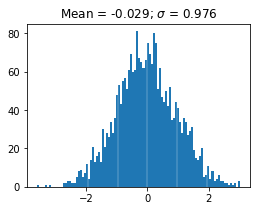

In [19]:
plotdist(t)

In [20]:
#hide
from nbdev.export import *
notebook2script()

Converted 00_core.ipynb.
Converted 01_mnist.ipynb.
Converted 99_index.ipynb.
